## Perceptron Learning Algorithm: Implementation & Analysis

## Understanding Perceptron Learning Algorithm

### 1. Data Loading and Exploration 
* Brief overview of the task.
* Description of the dataset used for analysis.

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# feature labels
columnNames = ["variance", "skewness", "curtosis", "entropy", "class"]

# reading downloaded dataset
banknoteAuthentication = pd.read_csv('data_banknote_authentication.txt', names=columnNames, header=None)

# data (as pandas dataframes) 
# Features and target variables
X = banknoteAuthentication[columnNames[:-1]]
y = banknoteAuthentication['class']

print(banknoteAuthentication.head())

# metadata 
metadata = {
    "description": "Banknote Authentication dataset",
    "num_samples": banknoteAuthentication.shape[0],
    "num_features": X.shape[1]
}
print(metadata)

# variable information 
variables = {
    "attributes": columnNames[:-1],
    "target": "class"
}
print(variables)

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
{'description': 'Banknote Authentication dataset', 'num_samples': 1372, 'num_features': 4}
{'attributes': ['variance', 'skewness', 'curtosis', 'entropy'], 'target': 'class'}


In [3]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

# features and target as numpy arrays
XNumpy = X.to_numpy()
yNumpy = y.to_numpy()

# display the numpy arrays
print("Features as NumPy array:")
print(XNumpy)
print("\nTarget as NumPy array:")
print(yNumpy)

Features as NumPy array:
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]

Target as NumPy array:
[0 0 0 ... 1 1 1]


In [4]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

# exploring data types
print("Data types:")
print(banknoteAuthentication.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(banknoteAuthentication.describe())

# Check if class labels are always 0 or 1
print("\nTarget values:")
print(banknoteAuthentication["class"].value_counts())

# Check for missing values
print("\nGeneral info:")
print(banknoteAuthentication.info())

Data types:
variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

Summary statistics:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

Target values:
class
0    762
1    610
Name: count, dtype: int64

General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Cou

In [5]:
# make 0 class labels -1
banknoteAuthentication['class'] = np.where(banknoteAuthentication['class'] == 0, -1, banknoteAuthentication['class'])
print(banknoteAuthentication["class"].value_counts())

class
-1    762
 1    610
Name: count, dtype: int64


Data types are as expected. Nothing will be done about it.

All samples have the class value of either 1 or 0 as it should be. Only 0s have been converted to -1.

All samples have non-null values for each attribute. Nothing will be done about it as well.

In [6]:
# Convert the DataFrame to a Numpy array
banknoteAuthenticationNumpy = banknoteAuthentication.to_numpy()
print("Dataset NumPy array shape:", banknoteAuthenticationNumpy.shape)
print("\nFirst few rows of the NumPy array:")
print(banknoteAuthenticationNumpy[:5])

Dataset NumPy array shape: (1372, 5)

First few rows of the NumPy array:
[[ 3.6216   8.6661  -2.8073  -0.44699 -1.     ]
 [ 4.5459   8.1674  -2.4586  -1.4621  -1.     ]
 [ 3.866   -2.6383   1.9242   0.10645 -1.     ]
 [ 3.4566   9.5228  -4.0112  -3.5944  -1.     ]
 [ 0.32924 -4.4552   4.5718  -0.9888  -1.     ]]


### 2. Data Preprocessing

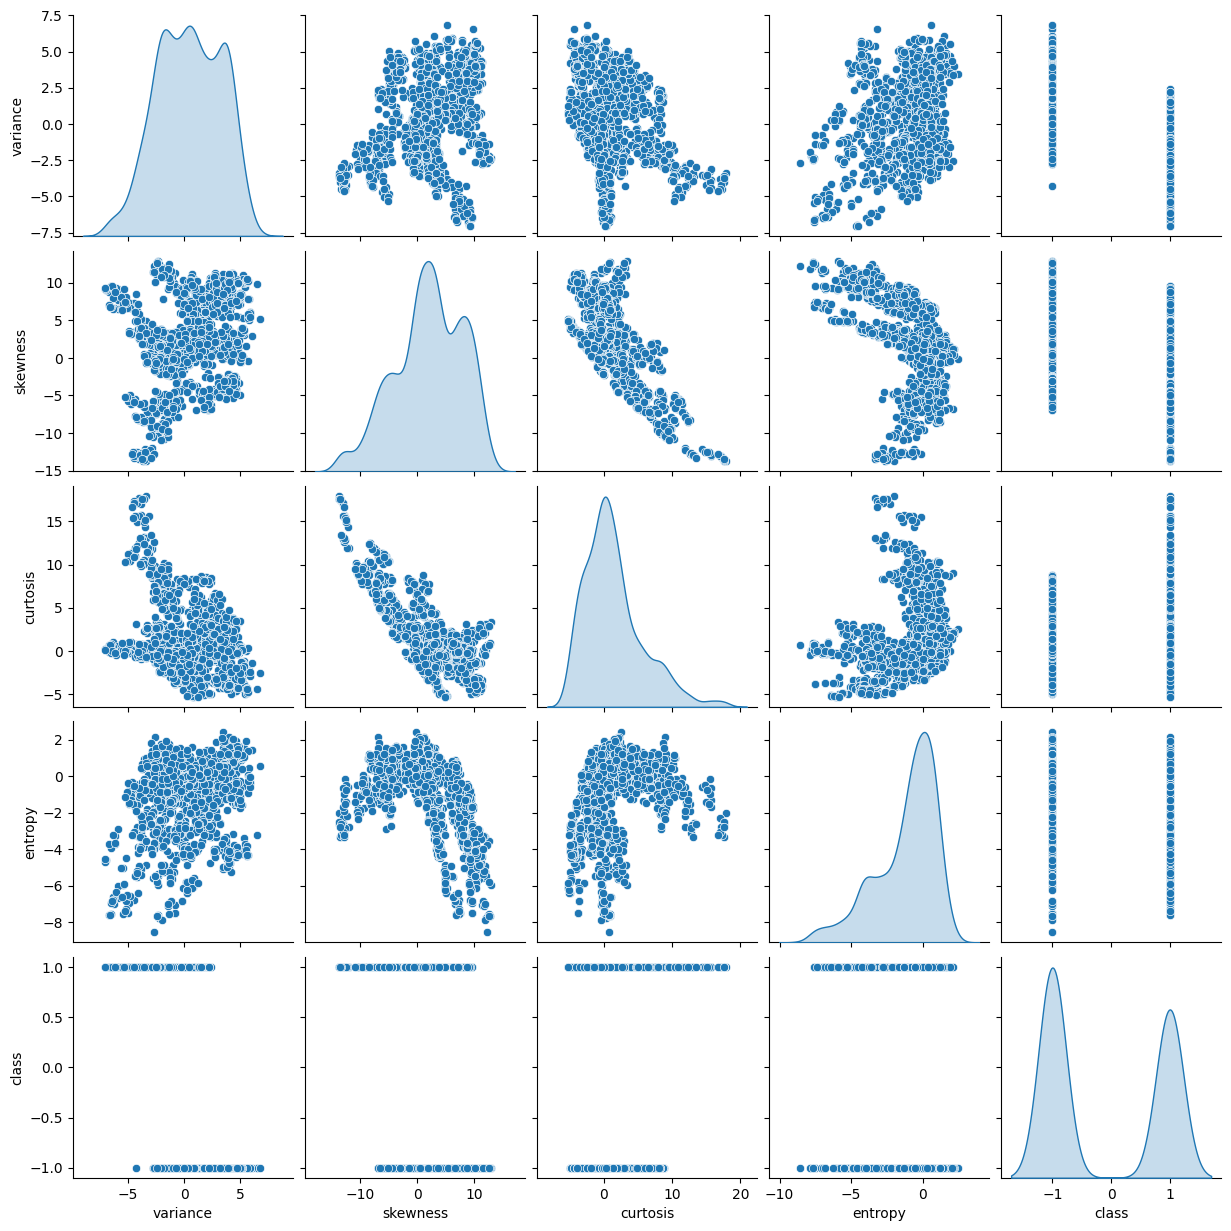

In [ ]:
# Visualizing the distributions of the features
sns.pairplot(banknoteAuthentication, diag_kind="kde")
plt.show()

# Standardizing variance feature
varianceMean = banknoteAuthentication['variance'].mean()
varianceStd = banknoteAuthentication['variance'].std()
banknoteAuthentication['variance'] = (banknoteAuthentication['variance'] - varianceMean) / varianceStd

# Min-Max scaling for skewness, curtosis, and entropy features
skewnessMin = banknoteAuthentication['skewness'].min()
skewnessMax = banknoteAuthentication['skewness'].max()
banknoteAuthentication['skewness'] = (banknoteAuthentication['skewness'] - skewnessMin) / (skewnessMax - skewnessMin)

curtosisMin = banknoteAuthentication['curtosis'].min()
curtosisMax = banknoteAuthentication['curtosis'].max()
banknoteAuthentication['curtosis'] = (banknoteAuthentication['curtosis'] - curtosisMin) / (curtosisMax - curtosisMin)

entropyMin = banknoteAuthentication['entropy'].min()
entropyMax = banknoteAuthentication['entropy'].max()
banknoteAuthentication['entropy'] = (banknoteAuthentication['entropy'] - entropyMin) / (entropyMax - entropyMin)


There are not any distributions among features with a significant outlier pattern. Therefore, robust scaling has not been applied.

Standardization is applied for the variance feature since its distribution is close to the normal distribution.

Min-max scaling is applied for the skewness, curtosis and entropy features since their distribution is skewed and not close to normal distribution.

Those decisions are made based on the graphs and summary stats of those distributions.

Valiadation and test sets help us to evaluate a model's performance by providing data that is unseen at the training phase. 

At the training phase, machine learning models typically find an equilibrium point. Actually, the learning ends after the training. But it's impossible to know if the model completed the learning in a useful form to our real world problems. By using test sets, we try to evalute the "generalization" capability of a trained model. A model may be either overfit or underfit so that it can't generalize on real world problems.

If we feed a model with test sets including seen data then our evaluation metrics will give misleading results due to memorizing. So it is a must for a model to not see the test data in training.

In [8]:
# Split the dataset into training and testing sets (80% train, 20% test)

# shuffling the dataframe to split randomly
banknoteAuthentication = banknoteAuthentication.sample(frac=1).reset_index(drop=True)

splitIndex = int(len(banknoteAuthentication) * 0.8)
X = banknoteAuthentication.iloc[:, :-1]   # All columns except the last (features)
y = banknoteAuthentication.iloc[:, -1]    # The last column (target)

# Split into training and testing sets
X_train = X.iloc[:splitIndex]
y_train = y.iloc[:splitIndex]

X_test = X.iloc[splitIndex:]
y_test = y.iloc[splitIndex:]


# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097,)
Shape of Y_test: (275,)


### 3. Implementing Perceptron for Binary Classification

Perceptron algorithm is an simple and efficient algorithm to use on linearly seperable binary classification problems. Our dataset is also a binary classification set. We'll investigate the linearly seperability later.

In [9]:
## Implement Percepton Learning Algorithm

def perceptron(X_train, y_train, learning_rate=0.1, max_epochs=700):
    # Initialization of weights and bias 
    feature_len = X_train.shape[1]
    weights = np.zeros(feature_len)
    bias = 0

    converged = False
    for epoch in range(max_epochs): 
        errors = 0
        for i in range(len(X_train)):
            # xw + b
            product = np.dot(X_train.iloc[i], weights) + bias
            # labeling with step activation function
            y_predicted = 1 if product >= 0 else -1
            
            # updates
            if y_train.iloc[i] != y_predicted:
                errors += 1
                weights += learning_rate * y_train.iloc[i] * X_train.iloc[i]
                bias += learning_rate * y_train.iloc[i]

        # convergence control
        if errors == 0:
            converged = True
            print(f"Converged after {epoch + 1} epochs.")
            break

    if not converged:
        print("Model did not converge after " + str(max_epochs) + " epochs.")

    # After training, print final learned parameters
    print("Final Weights:\n", weights)
    print("Final Bias:", bias)

    # Return the final learned parameters
    return [weights, bias]

If the dataset contains a problem where it's not linearly seperable we use the epoch count to finalize the algorithm. Otherwise it wouldn't converge with the zero mistake convergance rule. A low number of epoch count would result with a underfit model, whereas a high number of epoch count would take too much time. So, it's important to set an epoch count not too low or not too large.

As in many machine learning models, an error function is used to execute optimization. Iterative algorithms try to find global minimums of those error functions. And that iteration process's sharpness is determined by the "learning rate". A model with very high learning rate may miss that global minima. And a model with a significantly low learning rate may take too much time to find the global minima or may stuck in a local minima. 

Learning rate and max epoch count are both a hyperparameter in such algorithms and using a validation set to determine their sweet spots can be a proper way to determine their values.

In [10]:
# Accuracy implementation
def accuracy(X_test, y_test, weights, bias):
    correctPredicted = 0
    totalPredicted = len(X_test)
    y_pred = []  # List to store predictions


    for i in range(totalPredicted):
        product = np.dot(X_test.iloc[i], weights) + bias

        y_predicted = 1 if product >= 0 else -1
        y_pred.append(y_predicted)
        
        if y_predicted == y_test.iloc[i]:
            correctPredicted += 1

    accuracy = correctPredicted / totalPredicted * 100
    return accuracy, y_pred

#### Train the Perceptron

In [11]:
## Train the Perceptron model on the training set.
trainingResults = perceptron(X_train, y_train)
trainedWeights = trainingResults[0]
trainedBias = trainingResults[1]

Model did not converge after 700 epochs.
Final Weights:
 variance   -1.077713
skewness   -5.631518
curtosis   -5.969564
entropy    -0.500814
Name: 1, dtype: float64
Final Bias: 4.699999999999999


#### Prediction on Training Data

In [12]:
# Predicting on the training data
accuracyResultTraining, y_predTraining = accuracy(X_train, y_train, trainedWeights, trainedBias)
print("Training Accuracy:", accuracyResultTraining)

Training Accuracy: 98.54147675478579


### 4. Evaluating Perceptron for Binary Classification

#### Prediction on Validation Data

In [13]:
## Evaluate the model's performance on the test set by calculating accuracy.
accuracyResult, y_pred = accuracy(X_test, y_test, trainedWeights, trainedBias)
print("Testing Accuracy:", accuracyResult)

Testing Accuracy: 99.27272727272727


Guiding Questions:
1. What does accuracy tell us about the performance of the model?
2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.

1. Accuracy tells us the percantage of truly classified samples of a set.

2. Accuracy does not take the distribution of classes which can cause misleading interpretation. For example, if rare classes are classified with high accuracy and common classes are classified with low accuracy for a test set, it result with a low accuracy score. One can reach to a conclusion of the model cannot classify well, and that would be a misleading interpretation.

In [14]:
def calculate_metrics(y_true, y_pred):
    # Initialize counters for TP, FP, TN, and FN
    true_positive = false_positive = true_negative = false_negative = 0

    # Loop through actual and predicted labels to populate counters
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            true_positive += 1
        elif true == -1 and pred == 1:
            false_positive += 1
        elif true == -1 and pred == -1:
            true_negative += 1
        elif true == 1 and pred == -1:
            false_negative += 1

    # Calculate metrics
    accuracy = (true_positive + true_negative) / len(y_true)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.to_numpy().flatten(), y_predTraining)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9854147675478578
Training Precision: 1.0
Training Recall: 0.9675456389452333
Training F1 Score: 0.9835051546391752


Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.
2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.
3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.
4. What are the limitations of using F1 score alone?

1. If the cost of false positives is higher, then precision is a more important metric. A search algorithm that returns a very small number of highly relevant results for a query (high precision) but misses many other relevant pages (low recall).

2. Recall is more crticial where false negatives are more crucial (higher costed). For a fatal disease diagnosis recall is more important to not miss any candidates who may have the disease

3. For imbalanced sets, F1 gives a more comprehensive interpretation since it takes both false positives and false negatives into account. It's important to balance precision and recall in situations where both false positives and false negatives are costly. 

4. The F1 score assumes equal importance for precision and recall. For the examples at 1. and 2., this is not wanted. Also, it focuses on correctly classifying positive instances and capturing all relevant ones. However, it doesn't consider true negatives, which can be important in some scenarios where identifying irrelevant cases is crucial.
 

### 5. Visualization of the Hyperplane 

#### Step 1: Feature Selection Using Correlation Analysis

<Axes: >

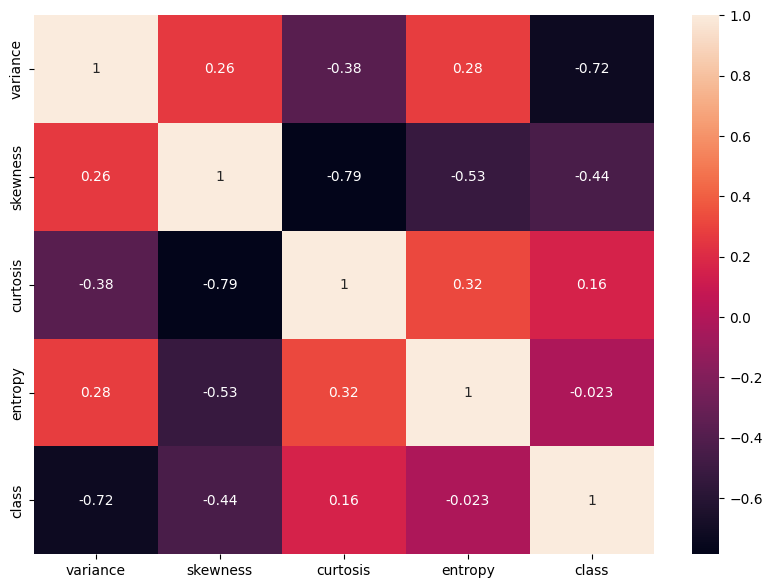

In [15]:
# Compute the correlation matrix
correlation_matrix = banknoteAuthentication.corr()
# Display the correlation matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True)

Based on the correlation analysis, two features are selected that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [16]:
# Select two features
# Select these features from the original feature set
banknoteAuthenticationFeatureSelected = banknoteAuthentication[["skewness", "variance", "class"]].copy()
# Split the selected features into training and validation sets if not done yet
banknoteAuthenticationFeatureSelected = banknoteAuthenticationFeatureSelected.sample(frac=1).reset_index(drop=True)

splitIndex = int(len(banknoteAuthenticationFeatureSelected) * 0.8)
XFeatureSelected = banknoteAuthenticationFeatureSelected.iloc[:, :-1]   
yFeatureSelected = banknoteAuthenticationFeatureSelected.iloc[:, -1]    

# Split into training and testing sets
XFeatureSelected_train = XFeatureSelected.iloc[:splitIndex]
yFeatureSelected_train = yFeatureSelected.iloc[:splitIndex]

XFeatureSelected_test = XFeatureSelected.iloc[splitIndex:]
yFeatureSelected_test = yFeatureSelected.iloc[splitIndex:]

# Print the shapes of the resulting sets
print("Shape of XFeatureSelected_train:", XFeatureSelected_train.shape)
print("Shape of XFeatureSelected_test:", XFeatureSelected_test.shape)
print("Shape of YFeatureSelected_train:", yFeatureSelected_train.shape)
print("Shape of YFeatureSelected_test:", yFeatureSelected_test.shape)

Shape of XFeatureSelected_train: (1097, 2)
Shape of XFeatureSelected_test: (275, 2)
Shape of YFeatureSelected_train: (1097,)
Shape of YFeatureSelected_test: (275,)


high-correlated pairs: skewness-curtosis, skewness-entropy
low-correlated pairs: skewness-variance, variance-entrpoy

Since skewness-variance is the lowest correlation, and both curtosis and entropy are highly correlated with entropy, dropping both entropy and curtosis is the better choice here to select two features. Additionally, the target feature class has most correlation with variance and skewness, it seems to be a good practice to select them target correlation perspective.

#### Step 2: Train the Perceptron on Selected Features

Retraining the Perceptron: After selecting two features, the Perceptron is trained using
only these two features. The same training and evaluation process as before is used,
but now the model will work in a two-dimensional feature space.

In [17]:
## Train the Perceptron model on the training set.
trainingResultsFeatureSelected = perceptron(XFeatureSelected_train, yFeatureSelected_train)
trainedWeightsFeatureSelected = trainingResultsFeatureSelected[0]
trainedBiasFeatureSelected = trainingResultsFeatureSelected[1]

# Predicting on the training data
accuracyResultTrainingFeatureSelected, y_predTrainingFeatureSelected = accuracy(XFeatureSelected_train, yFeatureSelected_train, trainedWeightsFeatureSelected, trainedBiasFeatureSelected)
print("Training Accuracy:", accuracyResultTrainingFeatureSelected)

Model did not converge after 700 epochs.
Final Weights:
 skewness   -0.353144
variance   -0.224219
Name: 0, dtype: float64
Final Bias: 0.20000000000000004
Training Accuracy: 86.32634457611668


Visualizing the decision boundary (hyperplane): Once the Perceptron is trained,
the decision boundary (hyperplane) plotted to see how the Perceptron separates the two
classes in 2D.

/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


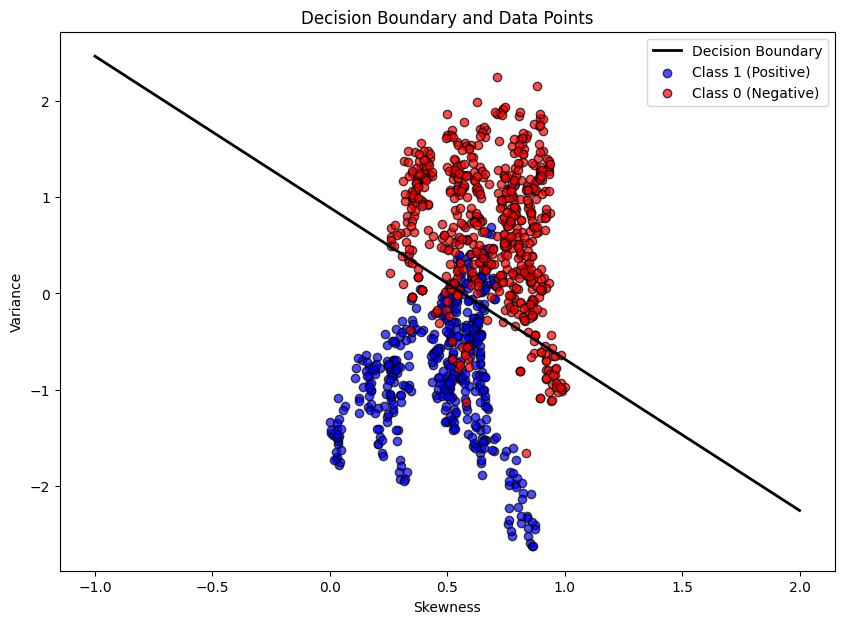

In [18]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, weights, bias, xlabel, ylabel):
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]
    # Creating a range of x values
    x_values = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100)
    # Calculating corresponding y values for the decision boundary
    y_values = slope * x_values + intercept

    # The plot
    plt.figure(figsize=(10, 7))
    
    # Plotting the decision boundary
    plt.plot(x_values, y_values, color='black', linewidth=2, label='Decision Boundary')

    class_1 = X[y == 1]
    class_0 = X[y == -1]
    
    # Plotting the data points with specific colors
    plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], color='blue', edgecolors='k', label='Class 1 (Positive)', alpha=0.7)
    plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], color='red', edgecolors='k', label='Class 0 (Negative)', alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Decision Boundary and Data Points')
    plt.legend()
    plt.show()

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(XFeatureSelected_train, yFeatureSelected_train, trainedWeightsFeatureSelected, trainedBiasFeatureSelected, "Skewness", "Variance")

#### Step 3: Experiment with Different Features

Guiding questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

Model did not converge after 700 epochs.
Final Weights:
 skewness   -0.624717
entropy    -0.363852
Name: 1, dtype: float64
Final Bias: 0.7
Training Accuracy for skewness-entropy: 69.46216955332726



/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


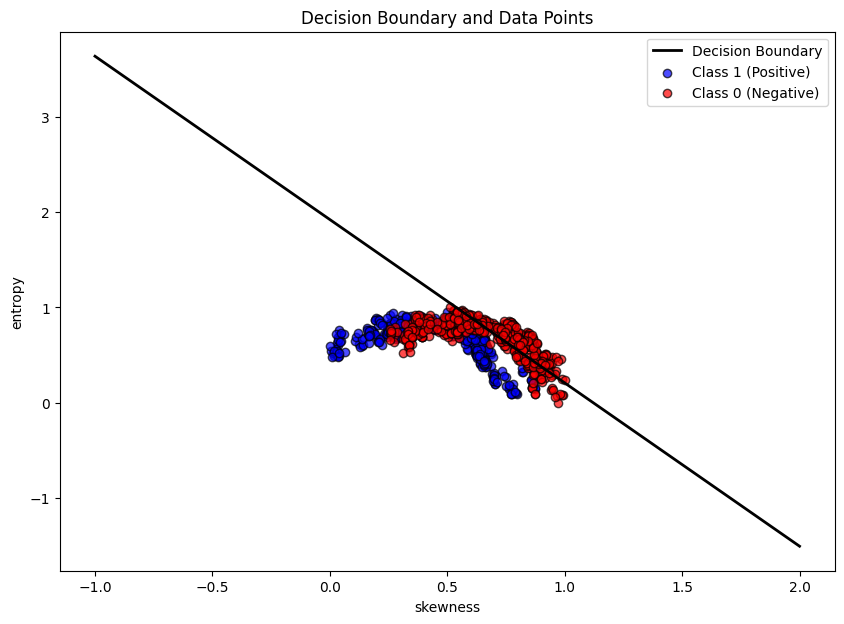

Model did not converge after 700 epochs.
Final Weights:
 skewness   -0.576134
curtosis   -0.413349
Name: 0, dtype: float64
Final Bias: 0.5
Training Accuracy for skewness-curtosis: 72.56153144940748



/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


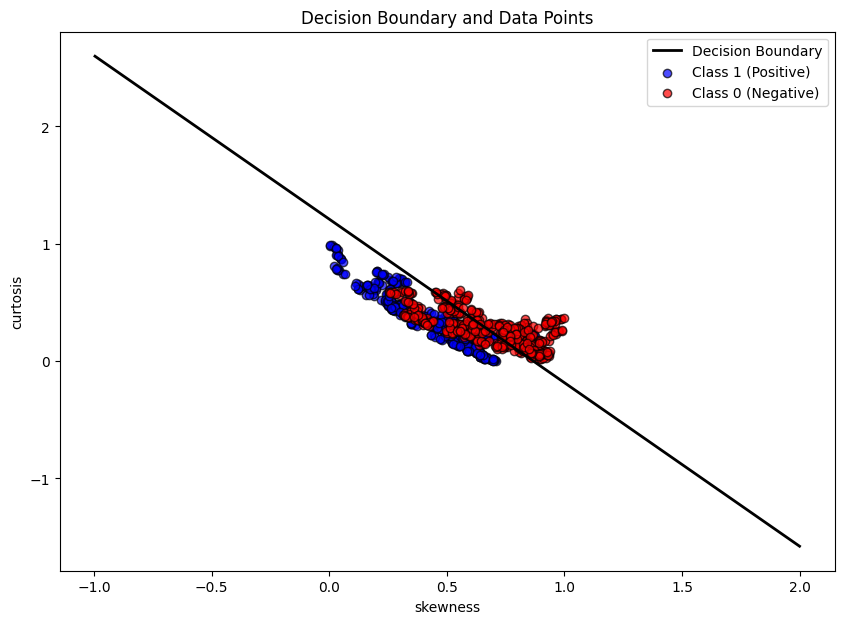

Model did not converge after 700 epochs.
Final Weights:
 skewness   -0.422475
variance   -0.223522
Name: 0, dtype: float64
Final Bias: 0.30000000000000004
Training Accuracy for skewness-variance: 84.04740200546946



/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


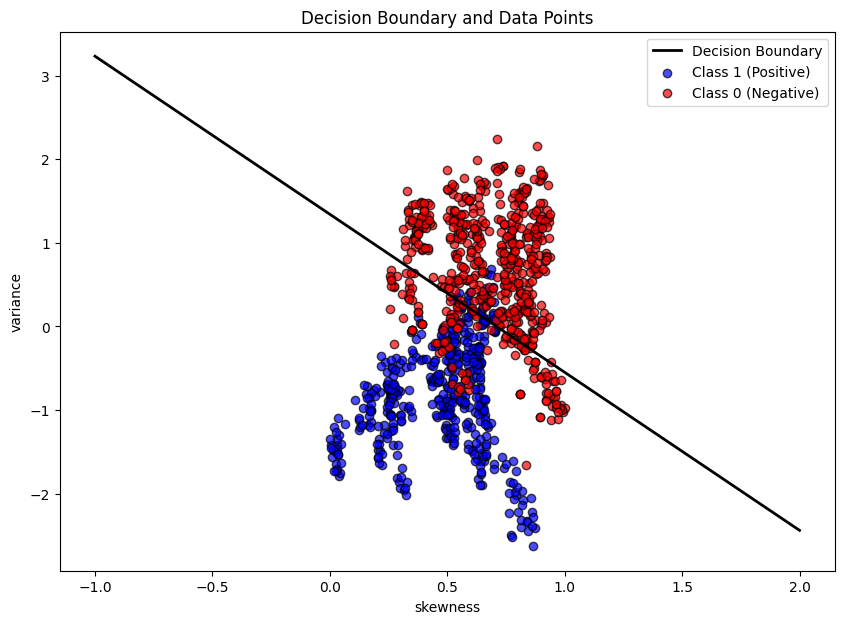

Model did not converge after 700 epochs.
Final Weights:
 entropy    -0.016032
curtosis    0.123430
Name: 0, dtype: float64
Final Bias: 0.1
Training Accuracy for entropy-curtosis: 44.02917046490428



/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


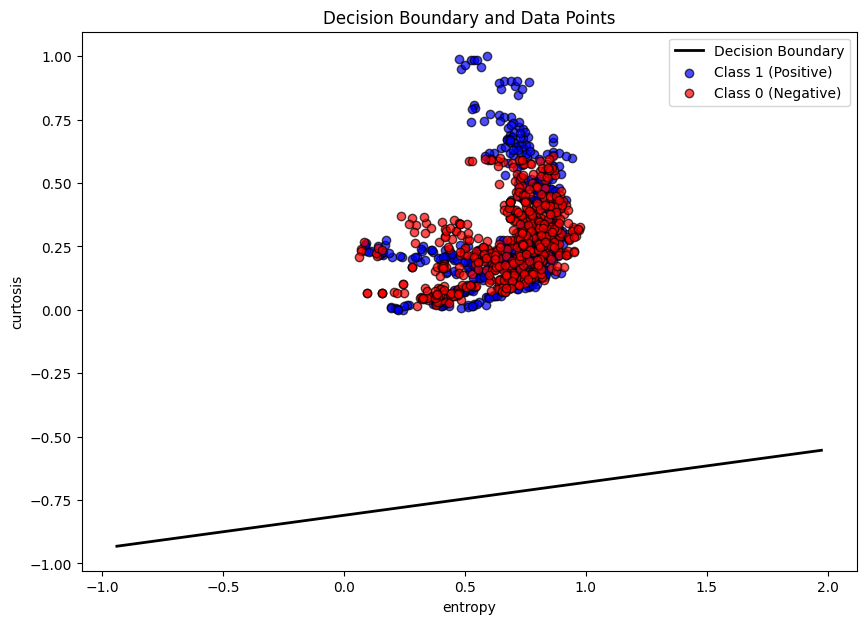

Model did not converge after 700 epochs.
Final Weights:
 entropy     0.274465
variance   -0.073543
Name: 1, dtype: float64
Final Bias: -0.30000000000000004
Training Accuracy for entropy-variance: 62.6253418413856



/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


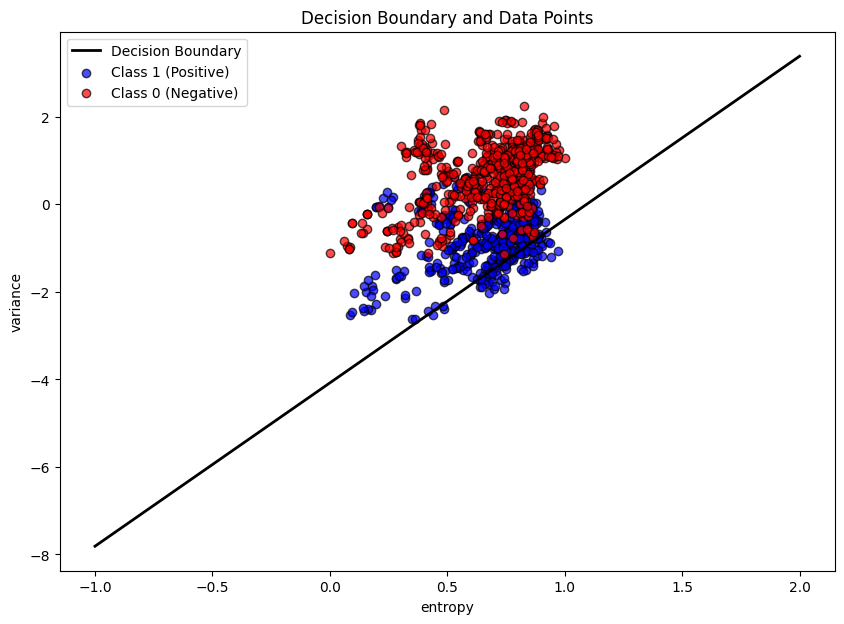

Model did not converge after 700 epochs.
Final Weights:
 curtosis   -0.189008
variance   -0.169120
Name: 0, dtype: float64
Final Bias: -0.1
Training Accuracy for curtosis-variance: 69.46216955332726



/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = -weights[0] / weights[1]
/var/folders/8d/b9gzcd5x54q7cjqvm_z_f3cw0000gn/T/ipykernel_89067/2620014875.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -bias / weights[1]


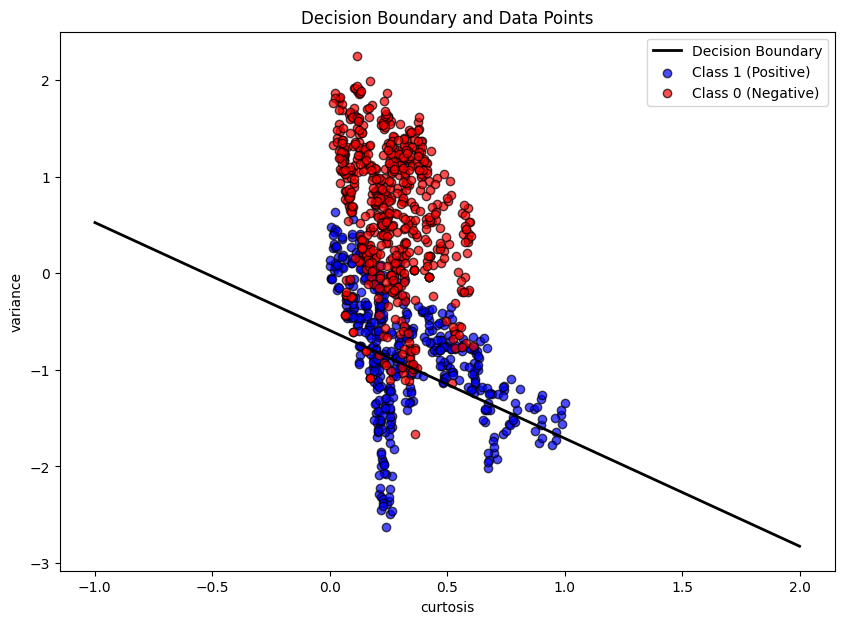

In [19]:
# Creating features combinations
featureNames = ["skewness", "entropy", "curtosis", "variance"]
combinations = []
for i in range(len(featureNames)):
    for j in range(i + 1, len(featureNames)):
        combinations.append([featureNames[i], featureNames[j], "class"])

# Training for each combination and displaying plot
for combo in combinations:
    banknoteAuthenticationFeatureSelected2 = banknoteAuthentication[combo].copy()
    # Split the selected features into training and validation sets if not done yet
    banknoteAuthenticationFeatureSelected2 = banknoteAuthenticationFeatureSelected2.sample(frac=1).reset_index(drop=True)

    splitIndex = int(len(banknoteAuthenticationFeatureSelected2) * 0.8)
    XFeatureSelected2 = banknoteAuthenticationFeatureSelected2.iloc[:, :-1]   
    yFeatureSelected2 = banknoteAuthenticationFeatureSelected2.iloc[:, -1]    

    # Split into training and testing sets
    XFeatureSelected2_train = XFeatureSelected2.iloc[:splitIndex]
    yFeatureSelected2_train = yFeatureSelected2.iloc[:splitIndex]

    XFeatureSelected2_test = XFeatureSelected2.iloc[splitIndex:]
    yFeatureSelected2_test = yFeatureSelected2.iloc[splitIndex:]

    ## Train the Perceptron model on the training set.
    trainingResultsFeatureSelected2 = perceptron(XFeatureSelected2_train, yFeatureSelected2_train)
    trainedWeightsFeatureSelected2 = trainingResultsFeatureSelected2[0]
    trainedBiasFeatureSelected2 = trainingResultsFeatureSelected2[1]

    # Predicting on the training data
    accuracyResultTrainingFeatureSelected2, y_predTrainingFeatureSelected2 = accuracy(XFeatureSelected2_train, yFeatureSelected2_train, trainedWeightsFeatureSelected2, trainedBiasFeatureSelected2)
    print("Training Accuracy for " + combo[0] + "-" + combo[1] + ": " + str(accuracyResultTrainingFeatureSelected2))
    print()

    plot_decision_boundary(XFeatureSelected2_train, yFeatureSelected2_train, trainedWeightsFeatureSelected2, trainedBiasFeatureSelected2, combo[0], combo[1])

1. The decision boundary is always linear, it's slope and position changes.

2. I've selected the best accuracy score given feature combination (skewness-variation) in the previous part. It seems like my implications based on correlation analysis were accurate. The scores changes from run to run since it's randomized. The worst performing combination is entropy-curtosis with an accuracy score around 0.5, very close to random accuracy. 

#### Step 5: Analyzing the Hyperplane 

Guiding questions: 

1. Why does the hyperplane change with different features or data points?
2. How does the decision boundary relate to the linearly separable nature of the data?

1. This algorithm aims to find a hyperplane that seperates two classes. Different data points change the cluster shapes and therefore the seperating hyperplanes differ. The update rule for weights and bias (representing hyperplane) are involves a multiplication with misclassified data points, that causes different hyperplanes with different data points mathematically.

2. If the data is linearly seperable, the algorithm would find a decision boundary that seperates two classes with no errors. If not, since the algorithm tries to maximize the classification the decision boundary may not be optimal. So, the algorithm isn't interested in margins to the decision boundary.